# Accessing argo data by float using Argopy

In [26]:
from argopy import DataFetcher as ArgoDataFetcher
plt.style.use('default')

argo_loader = ArgoDataFetcher()
argo_loader = ArgoDataFetcher(backend='erddap')
argo_loader = ArgoDataFetcher(cachedir='tmp')

In [27]:
apDS=argo_loader.float(6901254).to_xarray()

In [28]:
apDS2=argo_loader.profile(6901254,1).to_xarray()

In [29]:
data=apDS2.argo.point2profile()
data

<xarray.Dataset>
Dimensions:          (N_LEVELS: 97, N_PROF: 2)
Coordinates:
    LATITUDE         (N_PROF) float64 29.16 29.18
  * N_PROF           (N_PROF) int64 0 1
    TIME             (N_PROF) datetime64[ns] 2018-10-23T20:54:00 2018-10-25T05:30:00
    LONGITUDE        (N_PROF) float64 -15.49 -15.43
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 90 91 92 93 94 95 96
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 1 1
    DATA_MODE        (N_PROF) <U1 'R' 'R'
    DIRECTION        (N_PROF) <U1 'D' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6901254 6901254
    POSITION_QC      (N_PROF) int64 1 1
    PRES             (N_PROF, N_LEVELS) float64 14.0 24.0 ... 2.011e+03
    PRES_QC          (N_PROF) int64 1 1
    PSAL             (N_PROF, N_LEVELS) float64 36.69 36.71 ... 35.15 35.14
    PSAL_QC          (N_PROF) int64 1 1
    TEMP             (N_PROF, N_LEVELS) float64 23.4 23.35 23.33 ... 4.559 4.474
    TEMP_QC          (N_PROF) int64 1 1
    TIME_QC          (N_PROF) int64 1 1
Attributes:
    cdm_altitude_proxy:        pres
    cdm_data_type:             TrajectoryProfile
    cdm_profile_variables:     cycle_number, data_type, format_version, handb...
    cdm_trajectory_variables:  platform_number, project_name, pi_name, platfo...
    Conventions:               Argo-3.1, CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@argo.net
    creator_name:              Argo
    creator_url:               http://www.argo.net/
    Easternmost_Easting:       -15.428999999999974
    featureType:               TrajectoryProfile
    geospatial_lat_max:        29.182
    geospatial_lat_min:        29.162
    geospatial_lat_units:      degrees_north
    geospatial_lon_max:        -15.428999999999974
    geospatial_lon_min:        -15.488
    geospatial_lon_units:      degrees_east
    history:                   2020-07-24T11:55:02Z (local files)\n2020-07-24...
    id:                        ArgoFloats
    infoUrl:                   http://www.argo.net/
    institution:               Argo
    keywords:                  adjusted, argo, array, assembly, best, centre,...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The data may be used and redistributed for fre...
    Northernmost_Northing:     29.182
    references:                http://www.argodatamgt.org/Documentation
    source:                    Argo float
    sourceUrl:                 (local files)
    Southernmost_Northing:     29.162
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Argo float vertical profiles from Coriolis Glo...
    time_coverage_end:         2018-10-25T05:30:00Z
    time_coverage_start:       2018-10-23T20:54:00Z
    title:                     Argo Float Measurements
    user_manual_version:       3.1
    Westernmost_Easting:       -15.488
    DATA_ID:                   ARGO
    DOI:                       http://doi.org/10.17882/42182
    Fetched_from:              http://www.ifremer.fr/erddap
    Fetched_by:                pvb
    Fetched_date:              2020/07/24
    Fetched_constraints:       phy_WMO6901254_CYC0001
    Fetched_uri:               http://www.ifremer.fr/erddap/tabledap/ArgoFloa...

The core-Argo profile files contain the core parameters provided by a float: pressure, temperature, salinity, conductivity (PRES, TEMP, PSAL, CNDC). All additional parameters are managed in B-Argo data files (see §0).   

NameError: name 'cy1D' is not defined

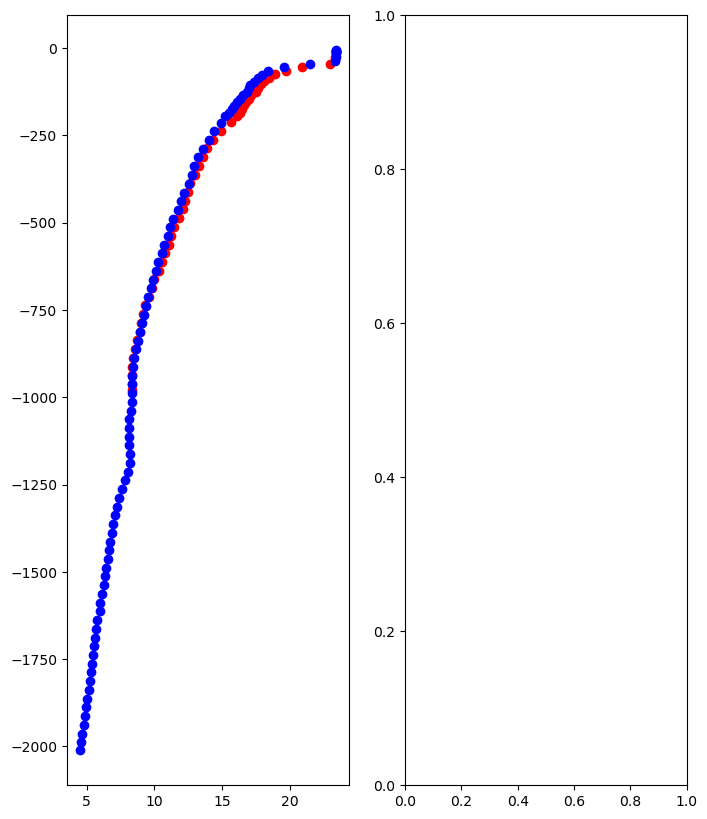

In [30]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(data.TEMP[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[0].plot(data.TEMP[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[0].plot(cy1D.TEMP[0],-cy1D.PRES[0],'k-',label='N_PROF=0 D')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend();

ax[1].plot(data.PSAL[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[1].plot(data.PSAL[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[1].plot(cy1D.PSAL[0],-cy1D.PRES[0],'k-',label='N_PROF=0 D')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].set_ylabel(cy1.PRES.long_name)
ax[1].grid()
ax[1].legend();


In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data.LONGITUDE[0],data.LATITUDE[0],'ko',label='001D N_PROF=0 Descending')
ax.plot(data.LONGITUDE[1],data.LATITUDE[1],'bo',label='001 N_PROF=0 Ascending')
#ax.set_title(cy1..long_name)
ax.text(data.LONGITUDE[0],cy1D.LATITUDE[0],'Date of observation for 001D:'+cy1D.JULD[0].values.astype(str), fontsize=14)
ax.text(data.LONGITUDE[1],cy1.LATITUDE[1],'Date of observation for 001:'+cy1.JULD[0].values.astype(str), fontsize=14)
ax.grid()
ax.legend();